In [1]:
import sys
import numpy as np
from pylab import *
from scipy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
# Specific imports
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import csv

In [32]:
bT = pd.read_table("b9.161.mu", skiprows=16, delim_whitespace=True, header=None)
bT9 = bT.apply(pd.to_numeric, errors='coerce')
bT9

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,9.0,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,1,2.0,0.0,0.0,0.049455,0.583748,-2.730559e-30,0.000000,0.000000e+00,-0.048603,-0.010399,-0.999871,NaN,NaN,NaN
3,1,3.0,0.0,0.0,0.518726,1.070874,1.965675e-25,0.000000,0.000000e+00,-0.509739,-0.107870,-0.985912,NaN,NaN,NaN
4,1,4.0,0.0,0.0,0.593364,1.181593,2.412720e-25,0.000000,-1.361958e-25,-0.583066,-0.122963,-0.981598,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2,95.0,0.0,0.0,5.295230,1.802173,9.705800e-01,4.507624,1.994183e-01,0.970580,0.199418,-0.949643,NaN,NaN,NaN
209,2,96.0,0.0,0.0,5.546183,1.402695,7.241598e-01,3.424659,1.515077e-01,0.724160,0.151508,-0.971723,NaN,NaN,NaN
210,2,97.0,0.0,0.0,5.795340,1.026253,4.793990e-01,2.296105,1.015802e-01,0.479399,0.101580,-0.987531,NaN,NaN,NaN
211,2,98.0,0.0,0.0,6.043309,0.712689,2.357387e-01,1.137553,5.032559e-02,0.235739,0.050326,-0.996974,NaN,NaN,NaN


In [34]:
bT = pd.read_table("b8.mu", skiprows=16, delim_whitespace=True, header=None)
bT8 = bT.apply(pd.to_numeric, errors='coerce')


In [39]:
bT = pd.read_table("b5.mu", skiprows=16, delim_whitespace=True, header=None)
bT5 = bT.apply(pd.to_numeric, errors='coerce')
bT5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,9.0,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,1,2.0,0.0,0.0,0.054592,0.583222,5.108372e-30,0.000000,0.000000e+00,-0.051339,-0.015513,-0.999786,NaN,NaN,NaN
3,1,3.0,0.0,0.0,0.602965,1.076627,2.745418e-23,0.000000,0.000000e+00,-0.566746,-0.168764,-0.974037,NaN,NaN,NaN
4,1,4.0,0.0,0.0,0.685522,1.182640,-2.021167e-24,0.000000,-9.201768e-25,-0.644248,-0.191011,-0.966512,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2,42.0,0.0,0.0,0.874468,1.434349,1.406036e-22,0.000000,-5.447496e-23,-0.821476,-0.240636,-0.945832,NaN,NaN,NaN
124,2,43.0,0.0,0.0,0.598598,1.071115,-5.861153e-30,0.000000,-8.811834e-31,-0.562646,-0.167579,-0.974409,NaN,NaN,NaN
125,2,44.0,0.0,0.0,0.324427,0.757327,-6.246711e-24,0.000000,-1.244474e-24,-0.305048,-0.091796,-0.992444,NaN,NaN,NaN
126,2,45.0,0.0,0.0,0.051194,0.582517,-2.035821e-25,0.000000,-1.304139e-25,-0.048143,-0.014548,-0.999811,NaN,NaN,NaN


In [43]:
bT = pd.read_table("b3.mu", skiprows=16, delim_whitespace=True, header=None)
bT3 = bT.apply(pd.to_numeric, errors='coerce')
bT3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,9.0,1.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,1,2.0,0.0,0.0,0.059575,0.582642,-1.016073e-29,0.000000,0.000000e+00,-0.051765,-0.021705,-0.999661,NaN,NaN,NaN
3,1,3.0,0.0,0.0,0.719144,1.103511,-9.813760e-24,0.000000,0.000000e+00,-0.623714,-0.256277,-0.951133,NaN,NaN,NaN
4,1,4.0,0.0,0.0,0.764349,1.153662,-2.847486e-24,0.000000,2.611614e-24,-0.662758,-0.271597,-0.944864,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,2,50.0,0.0,0.0,5.285423,1.420486,8.638278e-01,2.577812,3.482492e-01,0.863828,0.348249,-0.906751,NaN,NaN,NaN
127,2,51.0,0.0,0.0,5.512464,1.160785,6.682595e-01,2.026317,2.737451e-01,0.668259,0.273745,-0.943951,NaN,NaN,NaN
128,2,52.0,0.0,0.0,5.737908,0.918835,4.732956e-01,1.452083,1.961690e-01,0.473296,0.196169,-0.971792,NaN,NaN,NaN
129,2,53.0,0.0,0.0,6.036879,0.661910,2.139720e-01,0.662618,8.951632e-02,0.213972,0.089516,-0.994219,NaN,NaN,NaN


findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

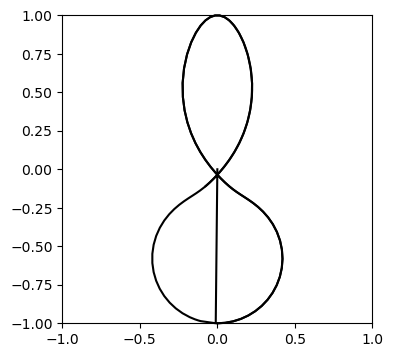

In [33]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

fig = plt.figure(figsize=(4, 4), dpi=100)
ax = plt.subplot(xlim=[0, 2*np.pi], ylim=[0, 2*np.pi])
plt.rcParams.update({"text.usetex": True})
n = 11
ax.set_xlim([-1.0,1.0])
ax.set_ylim([-1.0,1.0])
x_end=[]
y_end=[]
for bInd in np.arange(1,n):
    linewidth = 1.5 if bInd == 1 else 1.5
    linestyle = "-" if bInd == 1 else "-"
    color = "C1" if bInd == 0 else "%.2f" % (0.0)
    x_end=np.array(bT9.loc[bT9[0] == bInd][10].tolist())
    y_end=np.array((bT9.loc[bT9[0] == bInd][11]).tolist())
    ax.plot(bT9.loc[bT9[0] == bInd][10].tolist(),
            (bT9.loc[bT9[0] == bInd][11]).tolist(),
            color=color,
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            )


plt.show()

findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

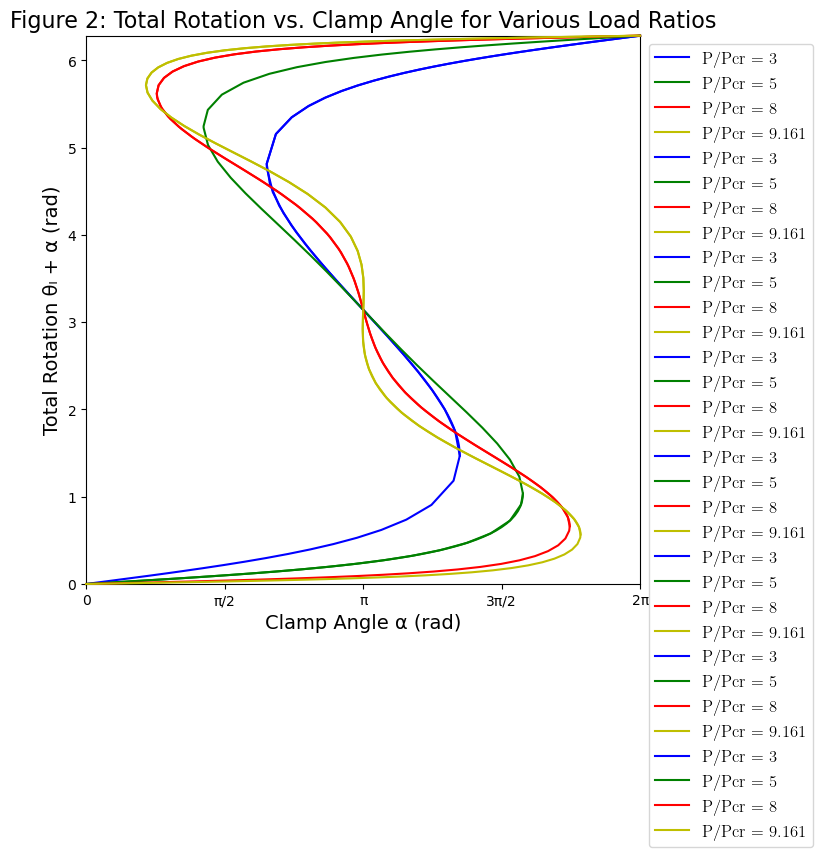

In [52]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

fig = plt.figure(figsize=(8, 8), dpi=100)
ax = plt.subplot(xlim=[0, 2*np.pi], ylim=[0, 2*np.pi])
plt.rcParams.update({"text.usetex": True})
n = 9
for bInd in np.arange(1,n):
    linewidth = 1.5 if bInd == 1 else 1.5
    linestyle = "-" if bInd == 1 else "-"
    color = "C1" if bInd == 0 else "%.2f" % (0.0)

    ax.plot(bT3.loc[bT3[0] == bInd][4].tolist(),
            (bT3.loc[bT3[0] == bInd][9]+bT3.loc[bT3[0] == bInd][4]).tolist(),
            color='b',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=f'P/Pcr = 3'
            )
    ax.plot(bT5.loc[bT5[0] == bInd][4].tolist(),
            (bT5.loc[bT5[0] == bInd][9]+bT5.loc[bT5[0] == bInd][4]).tolist(),
            color='g',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=f'P/Pcr = 5'
            )
    ax.plot(bT8.loc[bT8[0] == bInd][4].tolist(),
            (bT8.loc[bT8[0] == bInd][9]+bT8.loc[bT8[0] == bInd][4]).tolist(),
            color='r',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=f'P/Pcr = 8'
            )
    ax.plot(bT9.loc[bT9[0] == bInd][4].tolist(),
            (bT9.loc[bT9[0] == bInd][9]+bT9.loc[bT9[0] == bInd][4]).tolist(),
            color='y',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=f'P/Pcr = 9.161'
            )
            
plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.ylabel('Total Rotation θₗ + α (rad)', fontsize=14)
plt.title('Figure 2: Total Rotation vs. Clamp Angle for Various Load Ratios', fontsize=16)
plt.legend(fontsize=12, markerscale=5, loc='upper left', bbox_to_anchor=(1,1))
# plt.grid(True)
plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)  # Adjust based on expected range
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.tight_layout()
plt.show()

findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Font family 'Roboto Condensed' not found.
findfont: Fo

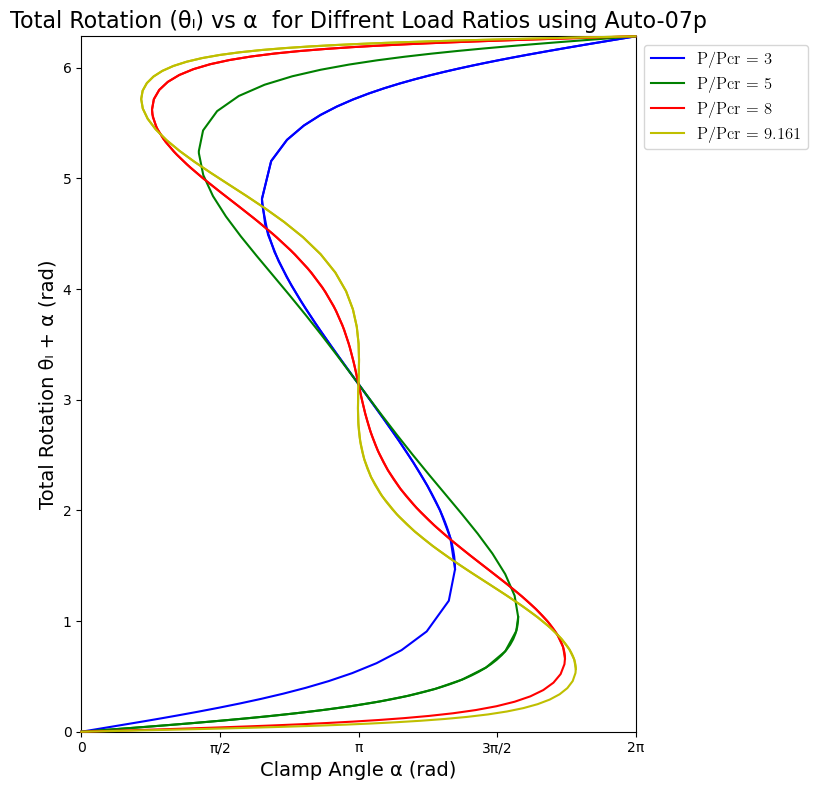

In [56]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rc("font", family="Roboto Condensed")
plt.rc("xtick", labelsize="medium")

fig = plt.figure(figsize=(8, 8), dpi=100)
ax = plt.subplot(xlim=[0, 2 * np.pi], ylim=[0, 2 * np.pi])
plt.rcParams.update({"text.usetex": True})

n = 9
labels_added = set()  # Track which labels have been added

for bInd in np.arange(1, n):
    linewidth = 1.5
    linestyle = "-"
    color = "C1" if bInd == 0 else "%.2f" % (0.0)

    # Plot for P/Pcr = 3
    label = 'P/Pcr = 3' if 'P/Pcr = 3' not in labels_added else None
    ax.plot(bT3.loc[bT3[0] == bInd][4].tolist(),
            (bT3.loc[bT3[0] == bInd][9] + bT3.loc[bT3[0] == bInd][4]).tolist(),
            color='b',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=label)
    labels_added.add('P/Pcr = 3')

    # Plot for P/Pcr = 5
    label = 'P/Pcr = 5' if 'P/Pcr = 5' not in labels_added else None
    ax.plot(bT5.loc[bT5[0] == bInd][4].tolist(),
            (bT5.loc[bT5[0] == bInd][9] + bT5.loc[bT5[0] == bInd][4]).tolist(),
            color='g',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=label)
    labels_added.add('P/Pcr = 5')

    # Plot for P/Pcr = 8
    label = 'P/Pcr = 8' if 'P/Pcr = 8' not in labels_added else None
    ax.plot(bT8.loc[bT8[0] == bInd][4].tolist(),
            (bT8.loc[bT8[0] == bInd][9] + bT8.loc[bT8[0] == bInd][4]).tolist(),
            color='r',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=label)
    labels_added.add('P/Pcr = 8')

    # Plot for P/Pcr = 9.161
    label = 'P/Pcr = 9.161' if 'P/Pcr = 9.161' not in labels_added else None
    ax.plot(bT9.loc[bT9[0] == bInd][4].tolist(),
            (bT9.loc[bT9[0] == bInd][9] + bT9.loc[bT9[0] == bInd][4]).tolist(),
            color='y',
            clip_on=False,
            zorder=n - bInd,
            linewidth=linewidth,
            linestyle=linestyle,
            label=label)
    labels_added.add('P/Pcr = 9.161')

plt.xlabel('Clamp Angle α (rad)', fontsize=14)
plt.ylabel('Total Rotation θₗ + α (rad)', fontsize=14)
plt.title('Total Rotation (θₗ) vs α  for Diffrent Load Ratios using Auto-07p', fontsize=16)
plt.legend(fontsize=12, markerscale=5, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)  # Adjust based on expected range
plt.xticks([0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi],
           ['0', 'π/2', 'π', '3π/2', '2π'])
plt.savefig('Auto-07p.pdf')
plt.tight_layout()
plt.show()


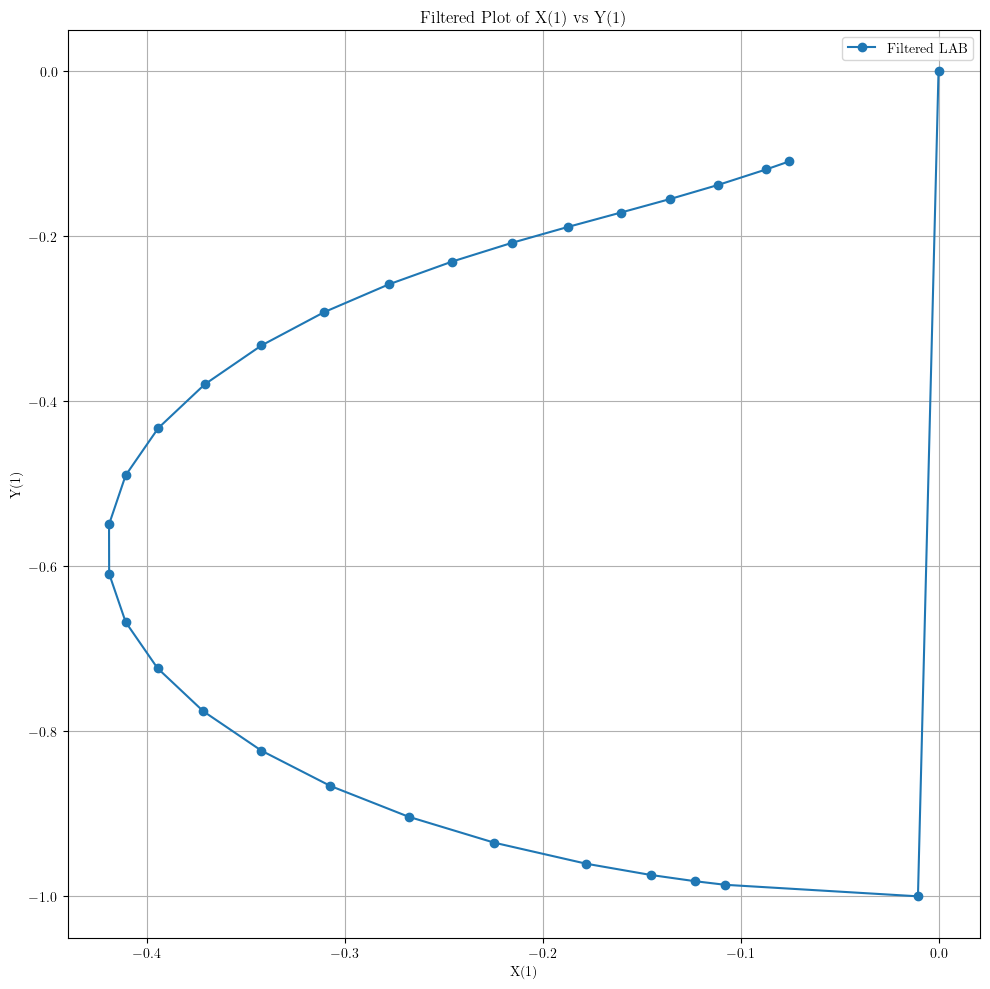

In [28]:

df = bT

index_3 = df[df[3] == 3].index.max()  # Last occurrence of LAB == 3
index_5 = df[df[3] == 5].index.min()  # First occurrence of LAB == 5

# Create two slices of the DataFrame:
# 1. Rows from the start up to LAB == 3
# 2. Rows from LAB == 5 onwards
df_filtered = pd.concat([df.iloc[:index_3 + 1], df.iloc[index_5:]])

# Plot X(1) vs Y(1) for the filtered data
plt.figure(figsize=(10, 10))
plt.plot(df.iloc[:index_3 + 1][10], df.iloc[:index_3 + 1][11], marker='o', linestyle='-', label="Filtered LAB")
plt.xlabel('X(1)')
plt.ylabel('Y(1)')
plt.title('Filtered Plot of X(1) vs Y(1)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()